In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
metrics = ["comet", "bertscore", "chrf", "bleu"]

In [9]:
translations_metrics = pd.read_csv('translations_scores/system_translations_basic_metrics.csv')

In [10]:
translations_metrics

,bleu_bielik_translation,chrf_bielik_translation,comet_bielik_translation,bertscore_bielik_translation,bleu_mixtral-8x22B_translation,chrf_mixtral-8x22B_translation,comet_mixtral-8x22B_translation,bertscore_mixtral-8x22B_translation,bleu_llama3.1_translation,chrf_llama3.1_translation,comet_llama3.1_translation,bertscore_llama3.1_translation,bleu_google_translation,chrf_google_translation,comet_google_translation,bertscore_google_translation
0,0.096988,0.432955,0.811752,0.822913,0.066982,0.390845,0.78461,0.79973,0.077287,0.394101,0.791538,0.807846,0.134378,0.446663,0.834337,0.828763


In [4]:
values = translations_metrics.values.flatten()

# Remove NaNs
values = [v for v in values if pd.notna(v)]

# Round each value to at most 3 decimal places
rounded_values = [round(float(v), 3) for v in values]

# Group into rows of 4
rows = [rounded_values[i:i+4] for i in range(0, len(rounded_values), 4)]

# Print each row in LaTeX tabular format
for row in rows:
    formatted = " & " + " & ".join(f"{v:.3f}" for v in row) + r" \\"
    print(formatted)

 & 0.097 & 0.433 & 0.812 & 0.823 \\
 & 0.067 & 0.391 & 0.785 & 0.800 \\
 & 0.077 & 0.394 & 0.792 & 0.808 \\
 & 0.134 & 0.447 & 0.834 & 0.829 \\


C:\Users\kajet\AppData\Local\Temp\ipykernel_14864\2065573102.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=comet_data, x="Model", y="Bert Score", palette="Set1")


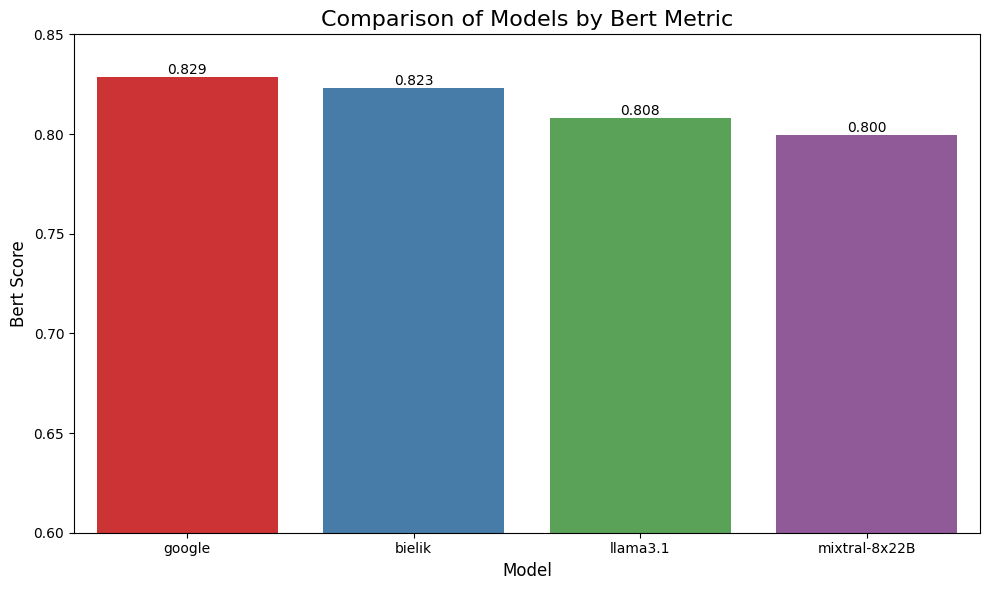

In [5]:
comet_columns = [col for col in translations_metrics.columns if "bertscore" in col.lower()]

# Prepare the data for plotting
comet_scores = translations_metrics[comet_columns].iloc[0]  # Assuming the scores are in the first row
comet_data = pd.DataFrame({
    "Model": comet_columns,
    "Bert Score": comet_scores.values
})
comet_data["Model"] = comet_data["Model"].apply(lambda x: x.split("_")[1] if len(x.split("_")) > 1 else x)

comet_data = comet_data.sort_values(by="Bert Score", ascending=False)
# Plot the graph
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=comet_data, x="Model", y="Bert Score", palette="Set1")
for p in ax.patches:
    if p.get_height() > 0:  # Only annotate bars with a height greater than 0
        ax.annotate(f'{p.get_height():.3f}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='bottom', fontsize=10)

plt.title("Comparison of Models by Bert Metric", fontsize=16)
plt.xlabel("Model", fontsize=12)
plt.ylabel("Bert Score", fontsize=12)
plt.ylim(0.6, 0.85)
plt.tight_layout()
plt.savefig("figs/models_comparision/bertscore_scores.png")
plt.show()

C:\Users\kajet\AppData\Local\Temp\ipykernel_14864\2987798407.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=comet_data, x="Model", y="Comet Score", palette="Set1")


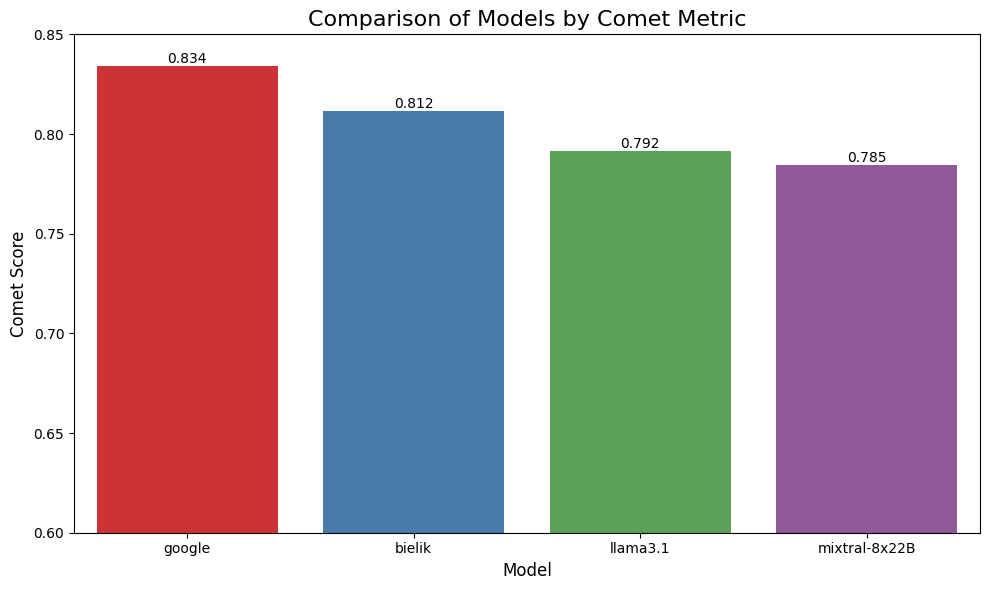

In [6]:
comet_columns = [col for col in translations_metrics.columns if "comet" in col.lower()]

# Prepare the data for plotting
comet_scores = translations_metrics[comet_columns].iloc[0]  # Assuming the scores are in the first row
comet_data = pd.DataFrame({
    "Model": comet_columns,
    "Comet Score": comet_scores.values
})
comet_data["Model"] = comet_data["Model"].apply(lambda x: x.split("_")[1] if len(x.split("_")) > 1 else x)

comet_data = comet_data.sort_values(by="Comet Score", ascending=False)
# Plot the graph
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=comet_data, x="Model", y="Comet Score", palette="Set1")
for p in ax.patches:
    if p.get_height() > 0:  # Only annotate bars with a height greater than 0
        ax.annotate(f'{p.get_height():.3f}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='bottom', fontsize=10)

plt.title("Comparison of Models by Comet Metric", fontsize=16)
plt.xlabel("Model", fontsize=12)
plt.ylabel("Comet Score", fontsize=12)
plt.ylim(0.6, 0.85)
plt.tight_layout()
plt.savefig("figs/models_comparision/comet_scores.png")
plt.show()

C:\Users\kajet\AppData\Local\Temp\ipykernel_14864\850666824.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=comet_data, x="Model", y="Bleu Score", palette="Set1")


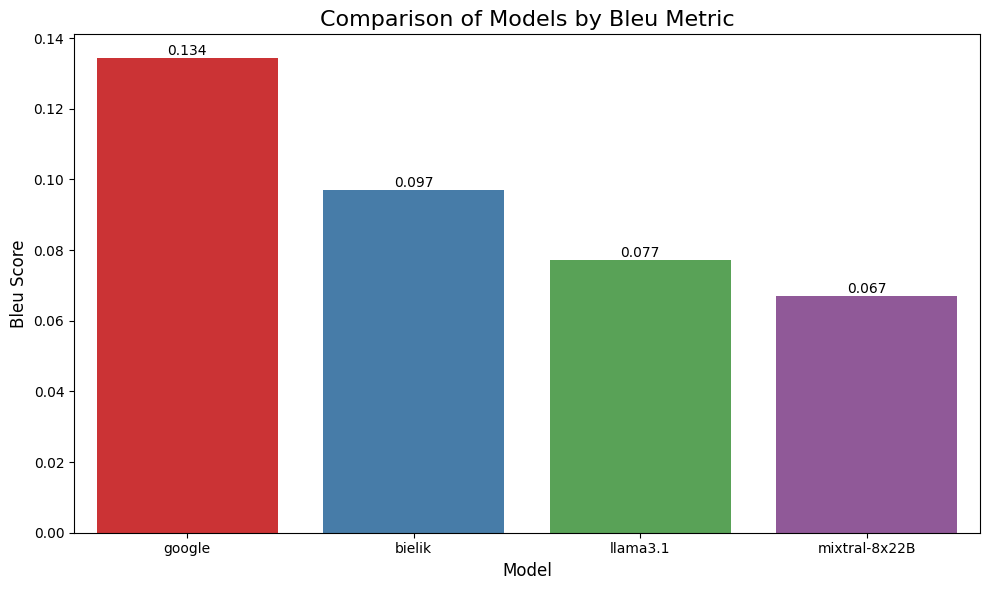

In [8]:
comet_columns = [col for col in translations_metrics.columns if "bleu" in col.lower()]

# Prepare the data for plotting
comet_scores = translations_metrics[comet_columns].iloc[0]  # Assuming the scores are in the first row
comet_data = pd.DataFrame({
    "Model": comet_columns,
    "Bleu Score": comet_scores.values
})
comet_data["Model"] = comet_data["Model"].apply(lambda x: x.split("_")[1] if len(x.split("_")) > 1 else x)

comet_data = comet_data.sort_values(by="Bleu Score", ascending=False)
# Plot the graph
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=comet_data, x="Model", y="Bleu Score", palette="Set1")
for p in ax.patches:
    if p.get_height() > 0:  # Only annotate bars with a height greater than 0
        ax.annotate(f'{p.get_height():.3f}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='bottom', fontsize=10)

plt.title("Comparison of Models by Bleu Metric", fontsize=16)
plt.xlabel("Model", fontsize=12)
plt.ylabel("Bleu Score", fontsize=12)
plt.tight_layout()
plt.savefig("figs/models_comparision/bleu_scores.png")
plt.show()

C:\Users\kajet\AppData\Local\Temp\ipykernel_14864\2338329071.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=comet_data, x="Model", y="Chrf Score", palette="Set1")


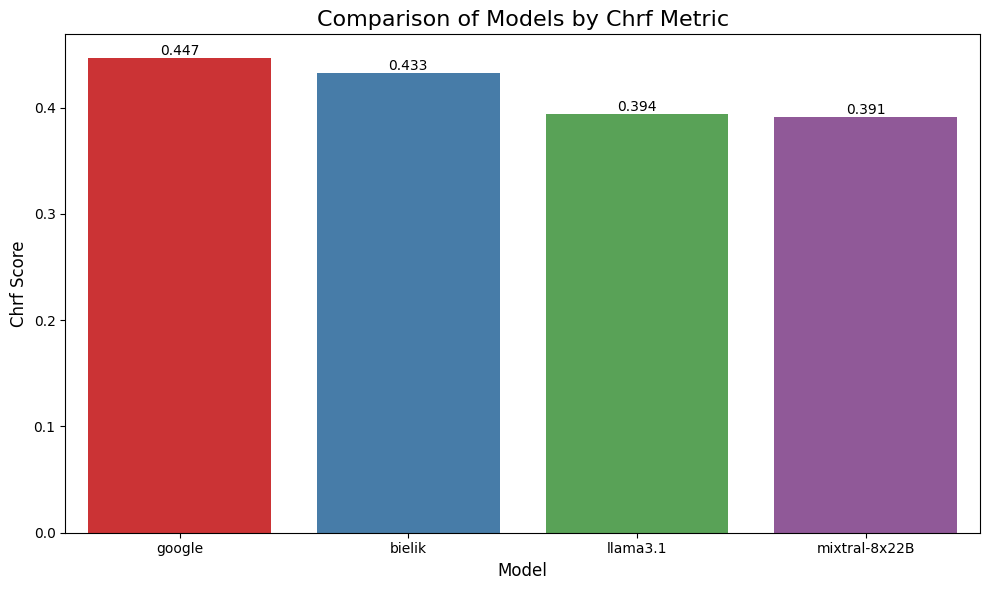

In [7]:
comet_columns = [col for col in translations_metrics.columns if "chrf" in col.lower()]

# Prepare the data for plotting
comet_scores = translations_metrics[comet_columns].iloc[0]  # Assuming the scores are in the first row
comet_data = pd.DataFrame({
    "Model": comet_columns,
    "Chrf Score": comet_scores.values
})
comet_data["Model"] = comet_data["Model"].apply(lambda x: x.split("_")[1] if len(x.split("_")) > 1 else x)

comet_data = comet_data.sort_values(by="Chrf Score", ascending=False)
# Plot the graph
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=comet_data, x="Model", y="Chrf Score", palette="Set1")
for p in ax.patches:
    if p.get_height() > 0:  # Only annotate bars with a height greater than 0
        ax.annotate(f'{p.get_height():.3f}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='bottom', fontsize=10)

plt.title("Comparison of Models by Chrf Metric", fontsize=16)
plt.xlabel("Model", fontsize=12)
plt.ylabel("Chrf Score", fontsize=12)
plt.tight_layout()
plt.savefig("figs/models_comparision/chrf_scores.png")
plt.show()

In [11]:
translations_temperatures_metrics = pd.read_csv('translations_scores/system_translations_temperatures_basic_metrics.csv')

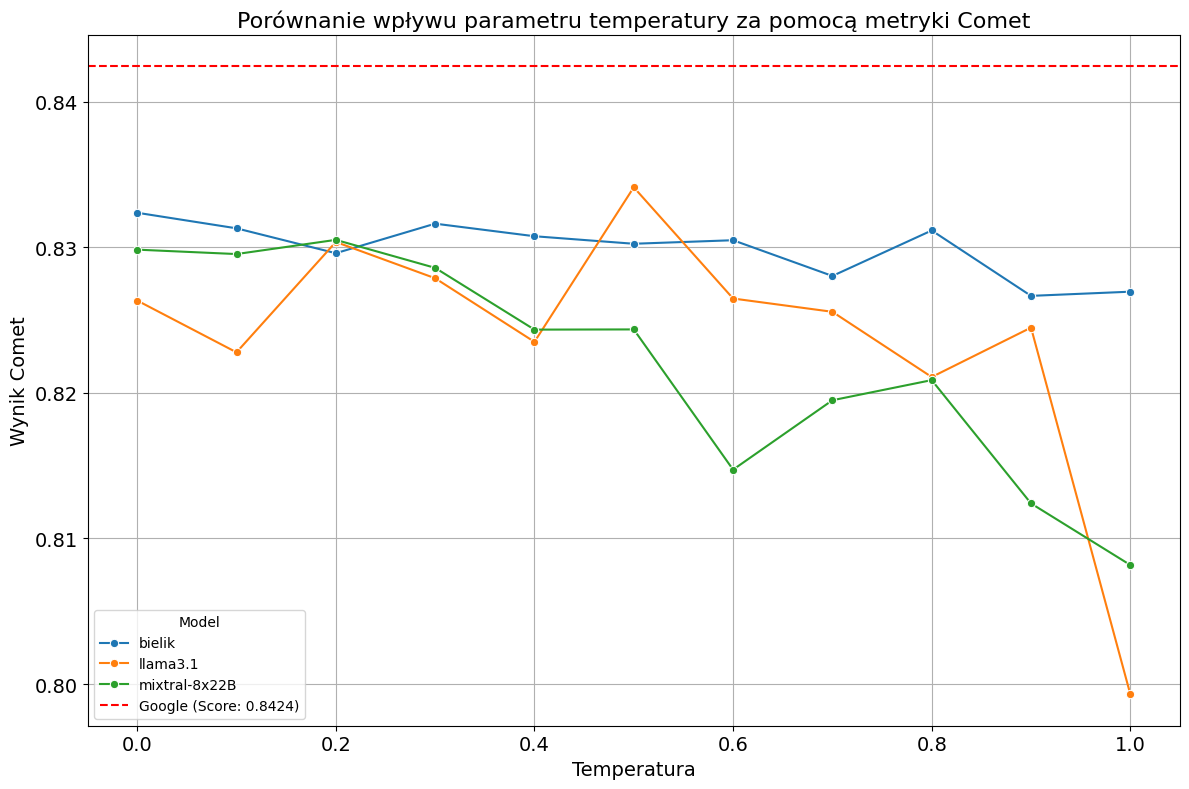

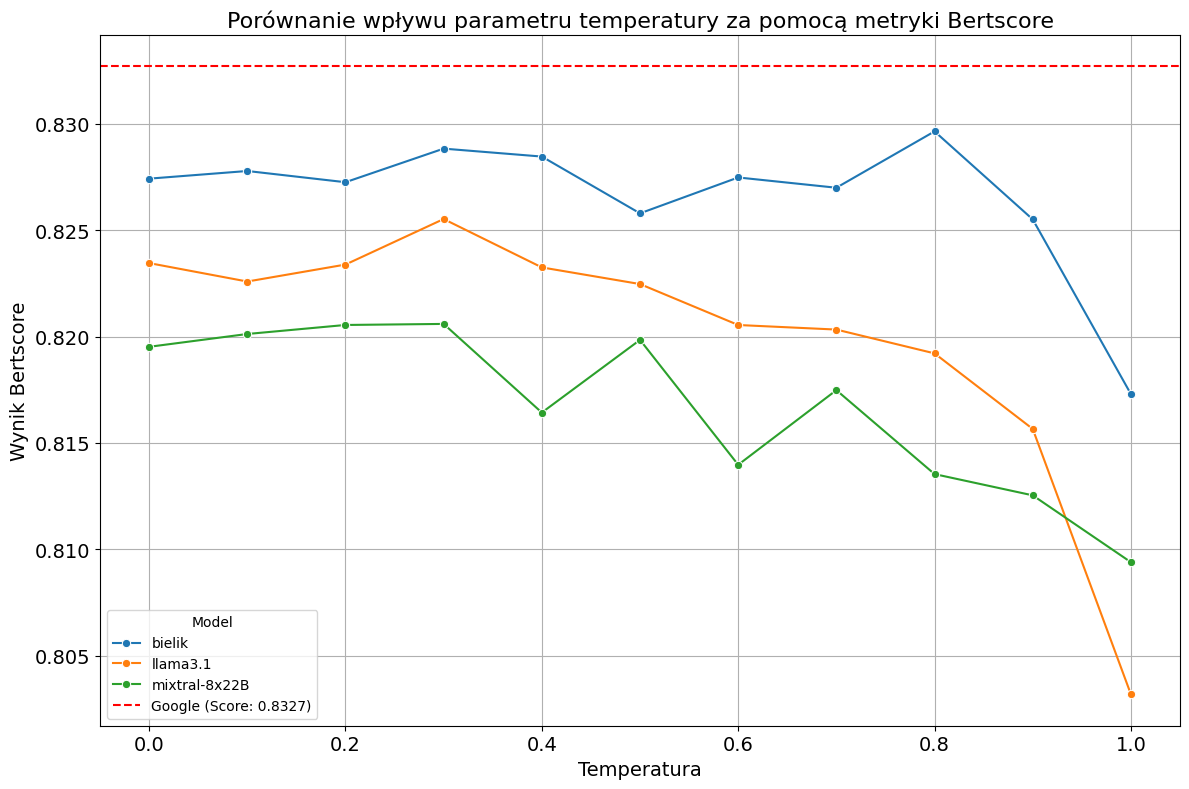

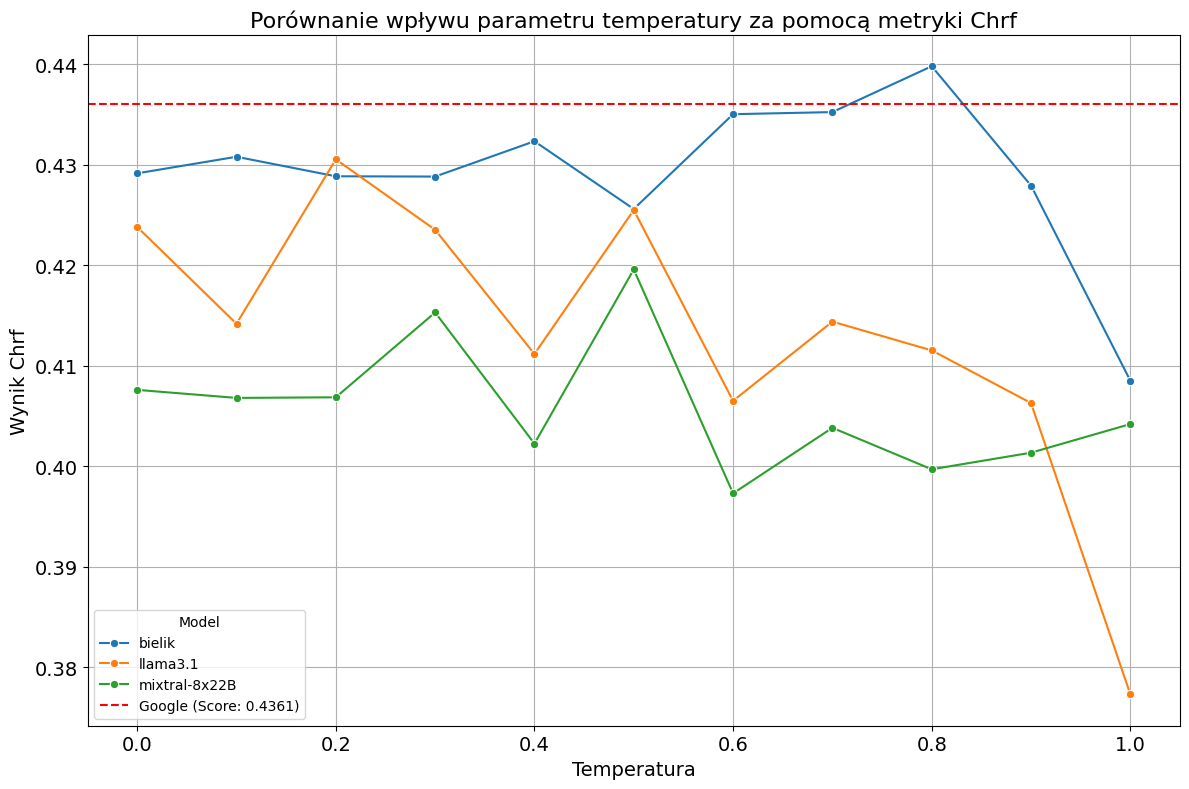

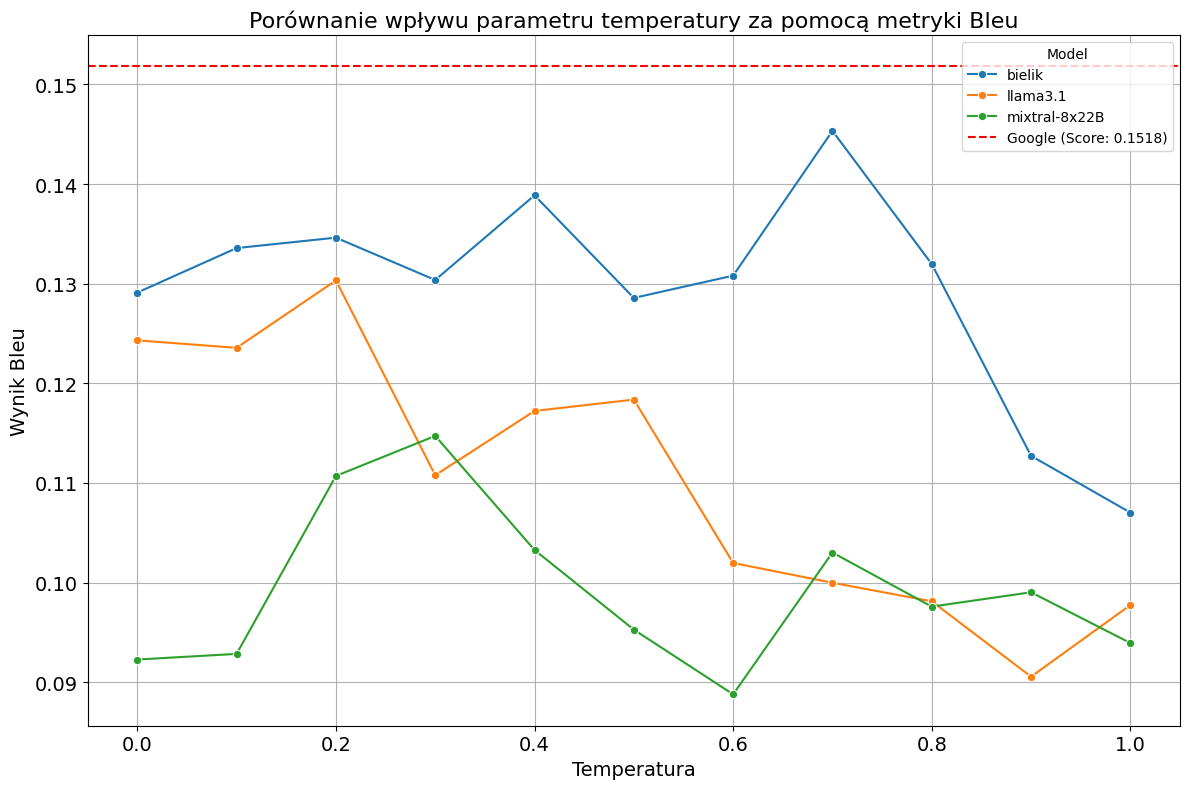

In [38]:
for metric in metrics:
    metric_columns = [col for col in translations_temperatures_metrics.columns if metric in col.lower()]

    # Extract model names and temperatures from column names
    data = []
    google_score = None  # Variable to store the Google score
    for col in metric_columns:
        parts = col.split("_")
        model_name = parts[1]
        temperature = parts[-1] if len(parts) > 3 else 0.0
        score = translations_temperatures_metrics[col].iloc[0]  # Assuming scores are in the first row
        data.append({"Model": model_name, "Temperatura": temperature, "Score": score})
        
        # Capture the Google score
        if model_name == "google":
            google_score = score

    plot_data = pd.DataFrame(data)

    # Exclude Google from the temperature-based comparison
    plot_data = plot_data[plot_data["Model"] != "google"]

    # Convert Temperature to a numeric type for sorting
    plot_data["Temperatura"] = plot_data["Temperatura"].astype(float)

    # Sort the data by Model and Temperature
    plot_data = plot_data.sort_values(by=["Model", "Temperatura"])

    # Plot the graph
    plt.figure(figsize=(12, 8))
    sns.lineplot(data=plot_data, x="Temperatura", y="Score", hue="Model", marker="o", palette="tab10")

    # Add a horizontal line for the Google score
    if google_score is not None:
        plt.axhline(y=google_score, color="red", linestyle="--", label=f"Google (Score: {google_score:.4f})")

    # Add titles and labels
    plt.title(f"Porównanie wpływu parametru temperatury za pomocą metryki {metric.capitalize()}", fontsize=16)
    plt.xlabel("Temperatura", fontsize=14)
    plt.ylabel(f"Wynik {metric.capitalize()}", fontsize=14)
    plt.legend(title="Model", fontsize=10)
    plt.xticks(fontsize=14)  # Increase x-axis tick label font size
    plt.yticks(fontsize=14)
    plt.grid(True)
    plt.tight_layout()

    # Save the plot
    plt.savefig(f"figs/{metric}_scores_by_temperature.png")
    plt.show()

In [12]:
translations_metrics_en_prompt = pd.read_csv('translations_scores/system_translations_en_prompt_basic_metrics.csv')
translations_temperatures_metrics_en_prompt = pd.read_csv('translations_scores/system_translations_temperatures_en_prompt_basic_metrics.csv')

In [13]:
google_columns = [col for col in translations_metrics.columns if "google" in col.lower()]
translations_metrics_en_prompt[google_columns] = translations_metrics[google_columns]

google_columns = [col for col in translations_temperatures_metrics.columns if "google" in col.lower()]
translations_temperatures_metrics_en_prompt[google_columns] = translations_temperatures_metrics[google_columns]

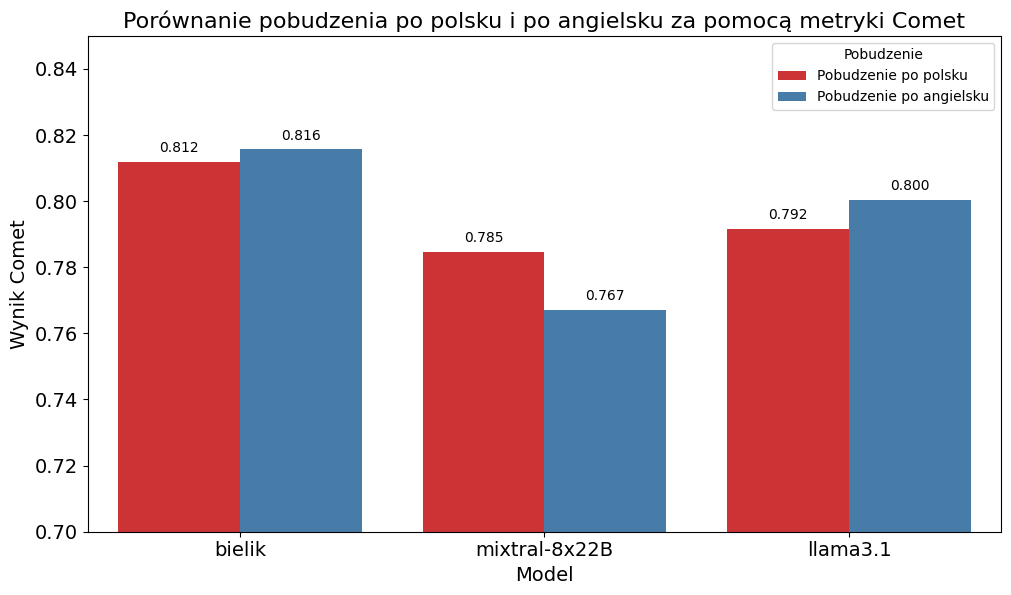

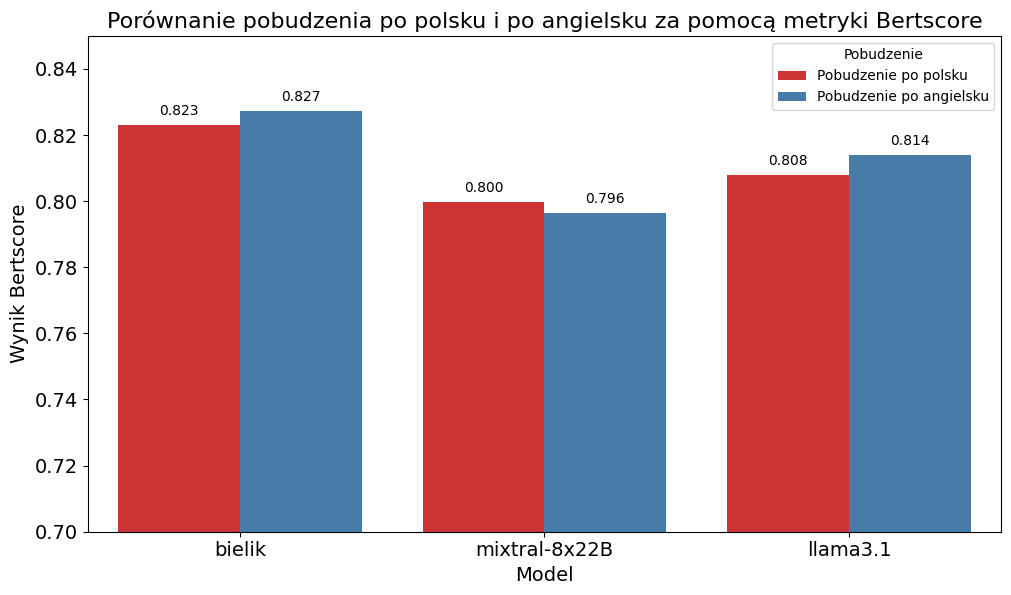

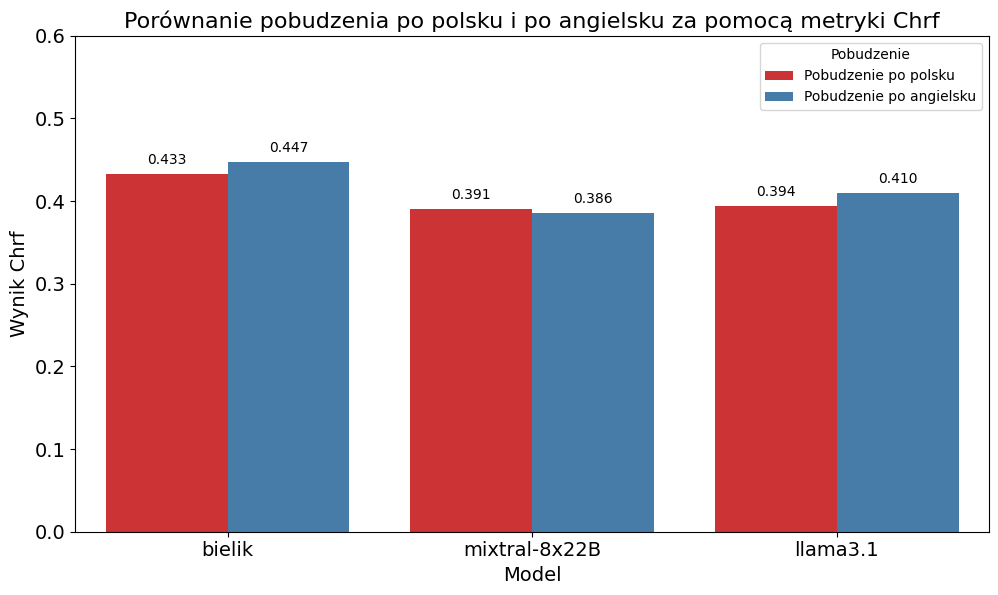

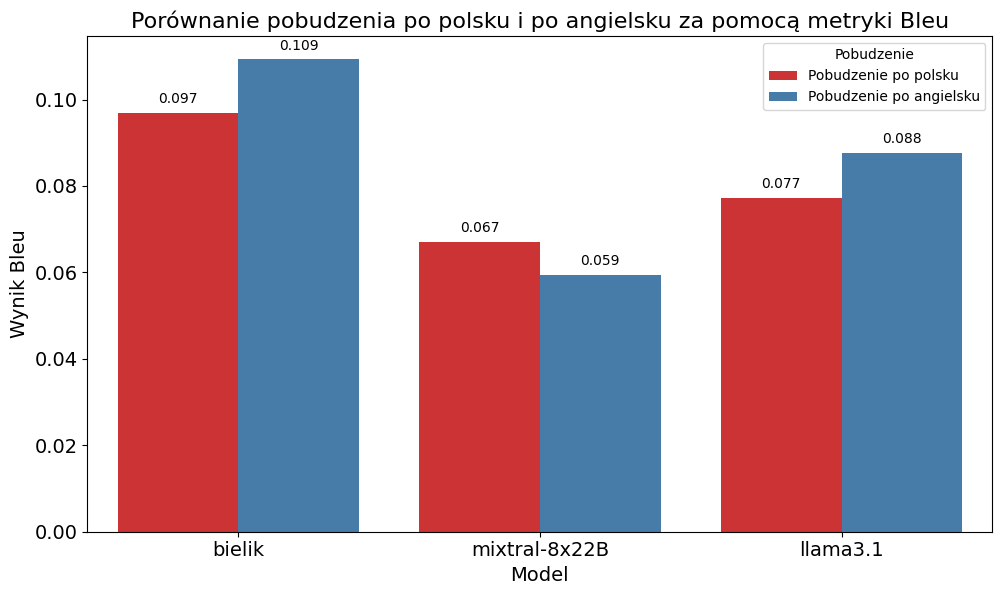

In [34]:
metrics = ["comet", "bertscore", "chrf", "bleu"]
for metric in metrics:
    columns_to_compare = [col for col in translations_metrics_en_prompt.columns if "google" not in col.lower() and metric in col.lower()]

    comparison_data = []
    for col in columns_to_compare:
        # Extract the model name from the column name
        model_name = col.split("_")[1]
        
        comparison_data.append({
            "Model": model_name,  # Use the model name instead of the full column name
            "Pobudzenie": "Pobudzenie po polsku",
            "Value": translations_metrics[col].iloc[0]
        })
        comparison_data.append({
            "Model": model_name,  # Use the model name instead of the full column name
            "Pobudzenie": "Pobudzenie po angielsku",
            "Value": translations_metrics_en_prompt[col].iloc[0]
        })

    comparison_df = pd.DataFrame(comparison_data)

    # Plot the graph
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(data=comparison_df, x="Model", y="Value", hue="Pobudzenie", palette="Set1")

    # Add values on top of the bars
    for p in ax.patches:
        if p.get_height() > 0.001:  # Only annotate bars with a height greater than 0
            ax.annotate(f"{p.get_height():.3f}", 
                        (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha='center', va='bottom', 
                        fontsize=10, color='black', 
                        xytext=(0, 5), 
                        textcoords='offset points')

    # Add titles and labels
    plt.title(f"Porównanie pobudzenia po polsku i po angielsku za pomocą metryki {metric.capitalize()}", fontsize=16)
    plt.xlabel("Model", fontsize=14)
    plt.ylabel(f"Wynik {metric.capitalize()}", fontsize=14)
    plt.tight_layout()

    if metric == "bleu":
        plt.ylim()
    elif metric == "chrf":
        plt.ylim(0.0, 0.6)
    else:
        plt.ylim(0.7, 0.85)

    plt.xticks(fontsize=14)  # Increase x-axis tick label font size
    plt.yticks(fontsize=14)
        
    plt.savefig(f"figs/{metric}_scores_en_pl_prompt.png")
    plt.show()

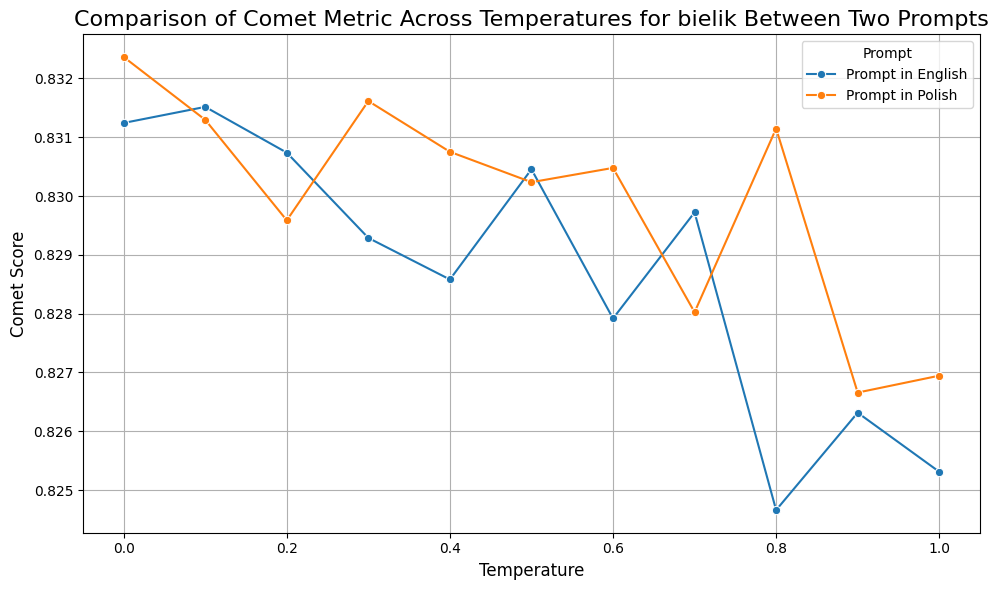

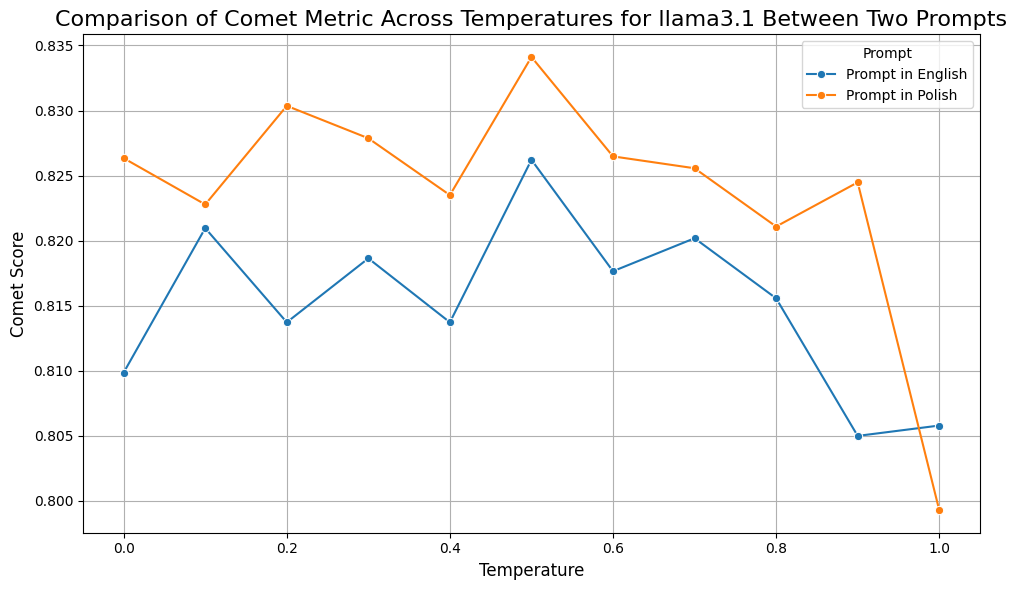

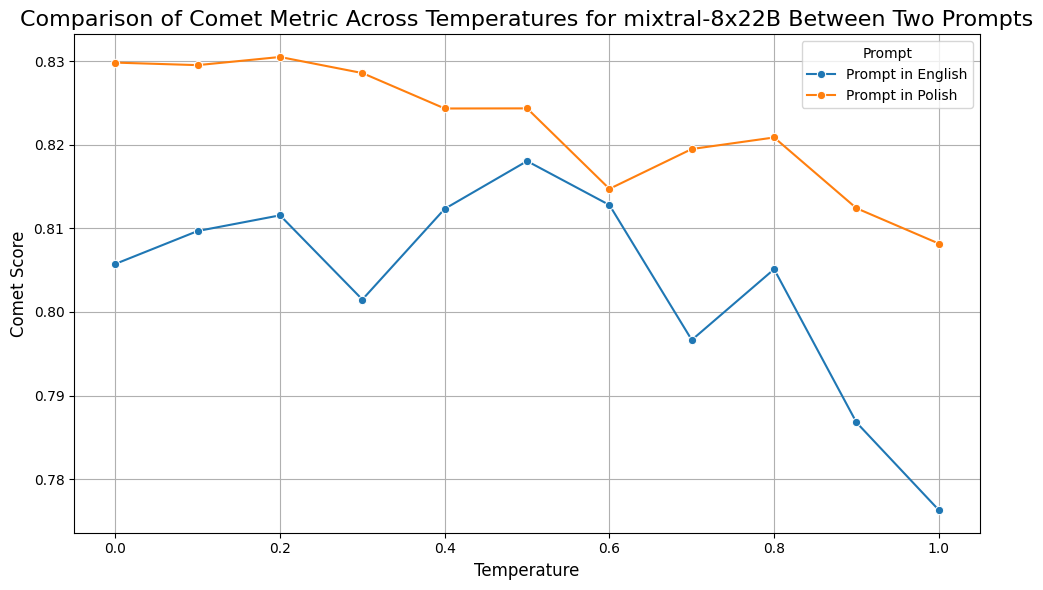

In [84]:
metric = "comet"

# Filter columns for the specific metric and exclude "google"
columns_to_compare_en = [col for col in translations_temperatures_metrics_en_prompt.columns if metric in col.lower() and "google" not in col.lower()]
columns_to_compare_pl = [col for col in translations_temperatures_metrics.columns if metric in col.lower() and "google" not in col.lower()]

comparison_data = []

# Process the English prompt dataset
for col in columns_to_compare_en:
    parts = col.split("_")
    model_name = parts[1]  # Extract the model name
    temperature = float(parts[-1]) if len(parts) > 3 else 0.0  # Extract the temperature
    value = translations_temperatures_metrics_en_prompt[col].iloc[0]  # Assuming scores are in the first row
    comparison_data.append({
        "Model": model_name,
        "Temperature": temperature,
        "Value": value,
        "Prompt": "Prompt in English"
    })

# Process the Polish prompt dataset
for col in columns_to_compare_pl:
    parts = col.split("_")
    model_name = parts[1]  # Extract the model name
    temperature = float(parts[-1]) if len(parts) > 3 else 0.0  # Extract the temperature
    value = translations_temperatures_metrics[col].iloc[0]  # Assuming scores are in the first row
    comparison_data.append({
        "Model": model_name,
        "Temperature": temperature,
        "Value": value,
        "Prompt": "Prompt in Polish"
    })

# Create a DataFrame for plotting
comparison_df = pd.DataFrame(comparison_data)

# Sort the data by Model, Temperature, and Dataset
comparison_df = comparison_df.sort_values(by=["Model", "Temperature", "Prompt"])

# Get the unique models
unique_models = comparison_df["Model"].unique()

# Plot a separate graph for each model
for model in unique_models:
    model_data = comparison_df[comparison_df["Model"] == model]
    
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=model_data, x="Temperature", y="Value", hue="Prompt", marker="o", palette="tab10")
    plt.title(f"Comparison of {metric.capitalize()} Metric Across Temperatures for {model} Between Two Prompts", fontsize=16)
    plt.xlabel("Temperature", fontsize=12)
    plt.ylabel(f"{metric.capitalize()} Score", fontsize=12)
    plt.legend(title="Prompt", fontsize=10)
    plt.grid(True)
    plt.tight_layout()
    
    # Save the plot
    plt.savefig(f"figs/models_comparision/{metric}_scores_across_temperatures_{model}.png")
    plt.show()

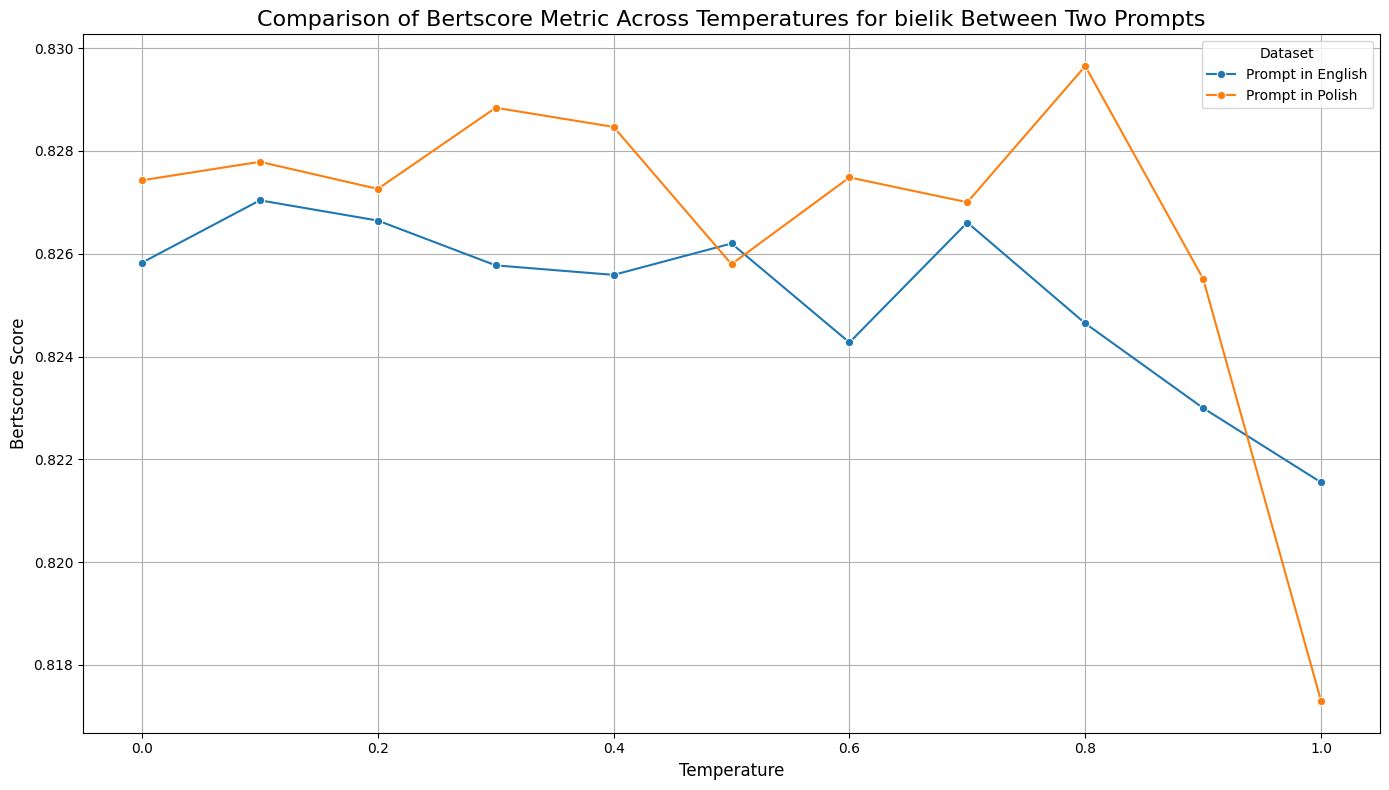

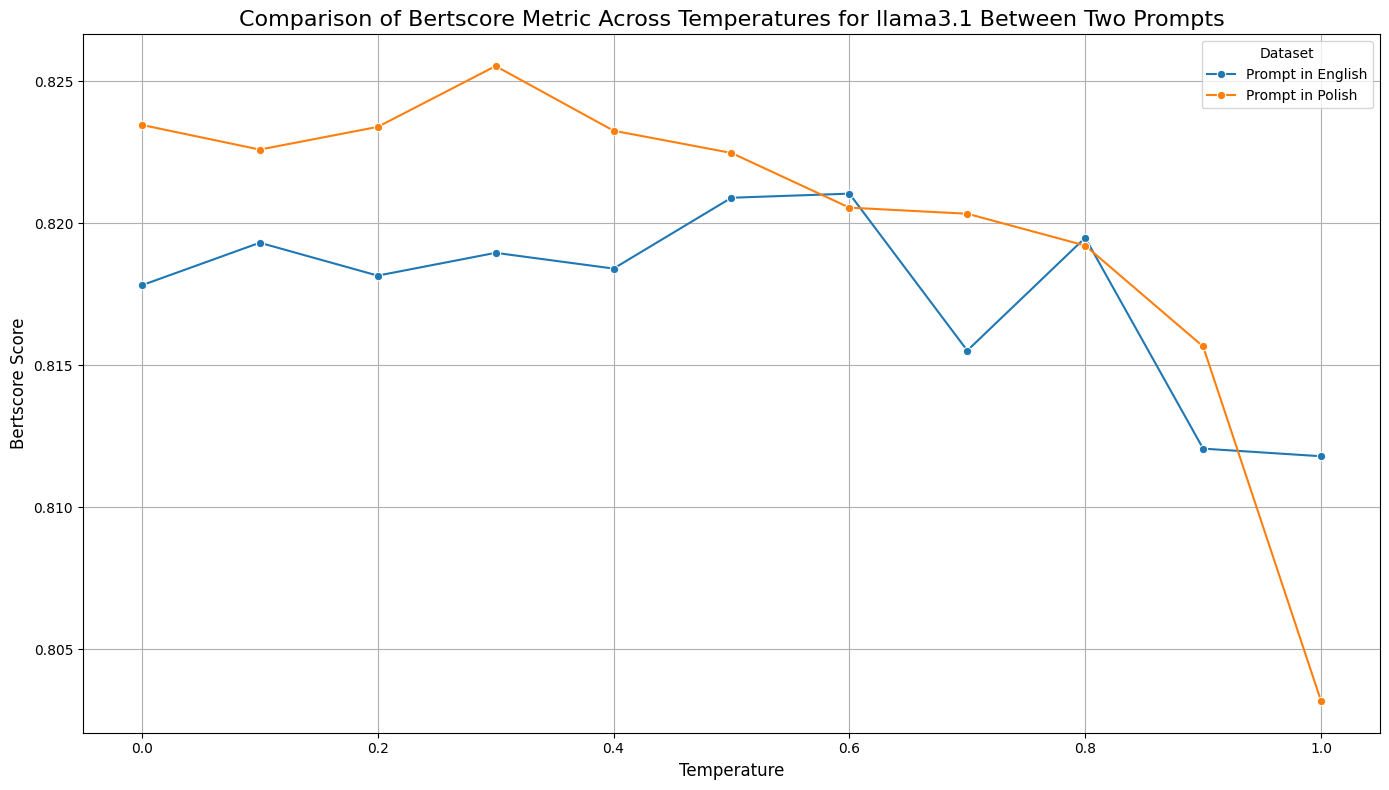

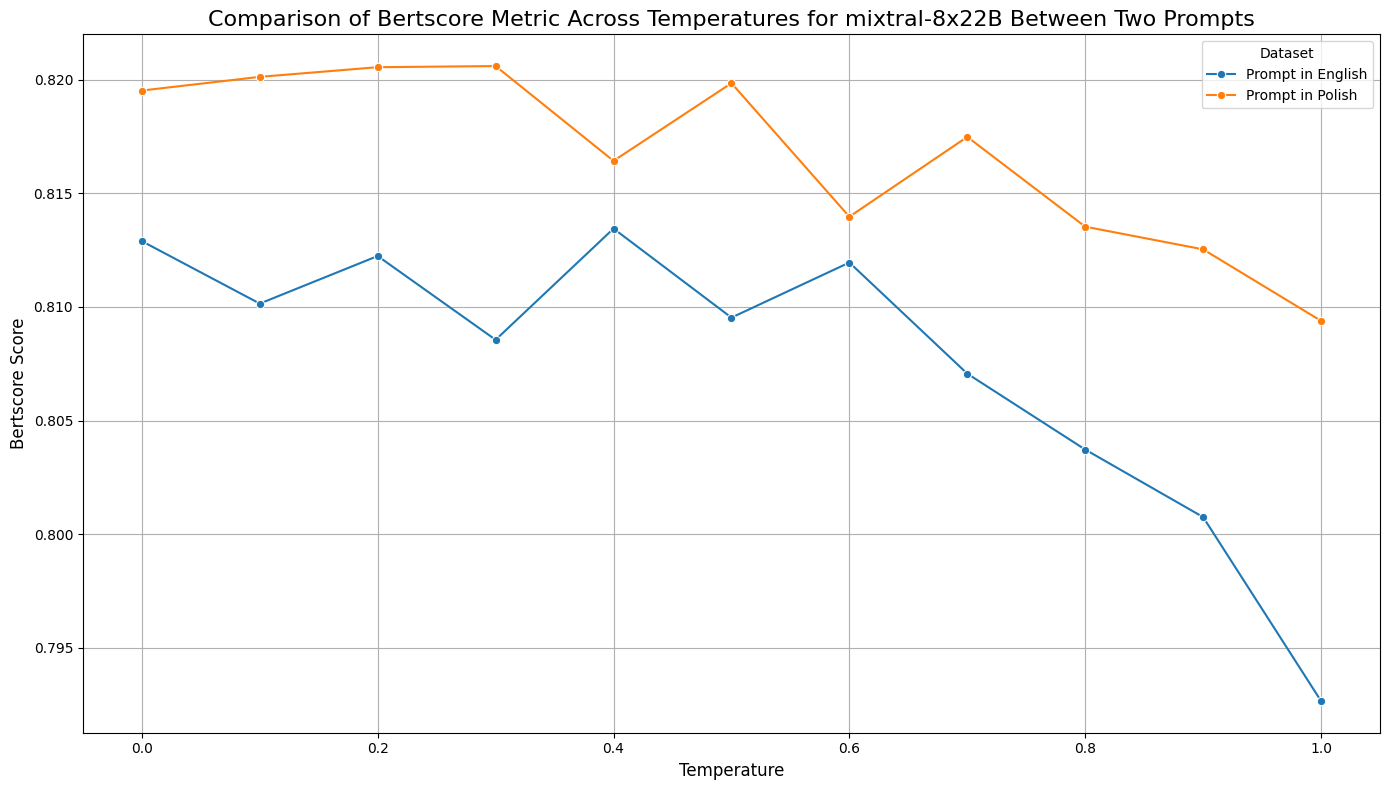

In [ ]:
metric = "bertscore"

# Filter columns for the specific metric and exclude "google"
columns_to_compare_en = [col for col in translations_temperatures_metrics_en_prompt.columns if metric in col.lower() and "google" not in col.lower()]
columns_to_compare_pl = [col for col in translations_temperatures_metrics.columns if metric in col.lower() and "google" not in col.lower()]

comparison_data = []

# Process the English prompt dataset
for col in columns_to_compare_en:
    parts = col.split("_")
    model_name = parts[1]  # Extract the model name
    temperature = float(parts[-1]) if len(parts) > 3 else 0.0  # Extract the temperature
    value = translations_temperatures_metrics_en_prompt[col].iloc[0]  # Assuming scores are in the first row
    comparison_data.append({
        "Model": model_name,
        "Temperature": temperature,
        "Value": value,
        "Prompt": "Prompt in English"
    })

# Process the Polish prompt dataset
for col in columns_to_compare_pl:
    parts = col.split("_")
    model_name = parts[1]  # Extract the model name
    temperature = float(parts[-1]) if len(parts) > 3 else 0.0  # Extract the temperature
    value = translations_temperatures_metrics[col].iloc[0]  # Assuming scores are in the first row
    comparison_data.append({
        "Model": model_name,
        "Temperature": temperature,
        "Value": value,
        "Prompt": "Prompt in Polish"
    })

# Create a DataFrame for plotting
comparison_df = pd.DataFrame(comparison_data)

# Sort the data by Model, Temperature, and Dataset
comparison_df = comparison_df.sort_values(by=["Model", "Temperature", "Prompt"])

# Get the unique models
unique_models = comparison_df["Model"].unique()

# Plot a separate graph for each model
for model in unique_models:
    model_data = comparison_df[comparison_df["Model"] == model]
    
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=model_data, x="Temperature", y="Value", hue="Prompt", marker="o", palette="tab10")
    plt.title(f"Comparison of {metric.capitalize()} Metric Across Temperatures for {model} Between Two Prompts", fontsize=16)
    plt.xlabel("Temperature", fontsize=12)
    plt.ylabel(f"{metric.capitalize()} Score", fontsize=12)
    plt.legend(title="Dataset", fontsize=10)
    plt.grid(True)
    plt.tight_layout()
    
    # Save the plot
    plt.savefig(f"figs/models_comparision/{metric}_scores_across_temperatures_{model}.png")
    plt.show()

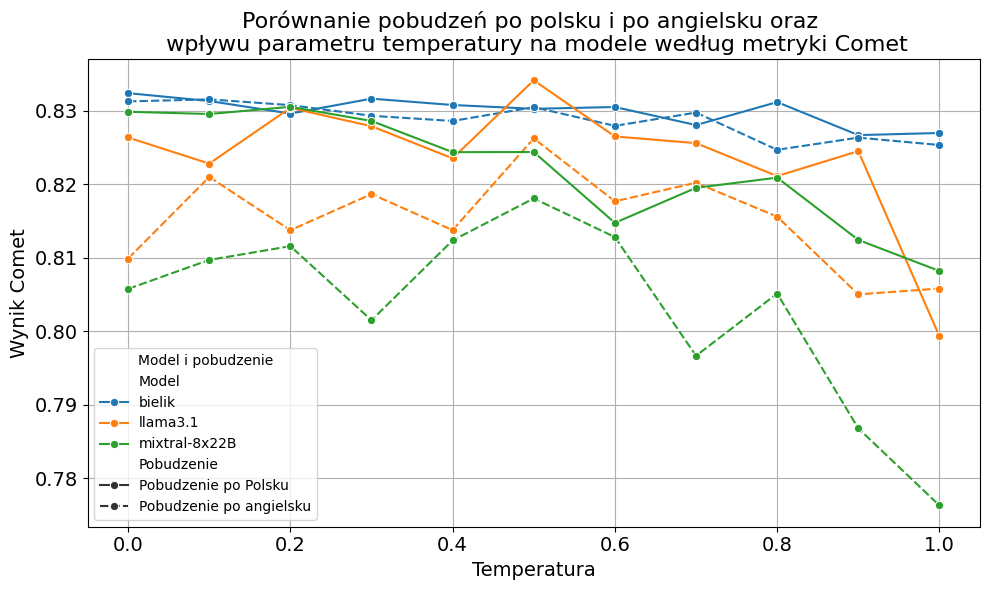

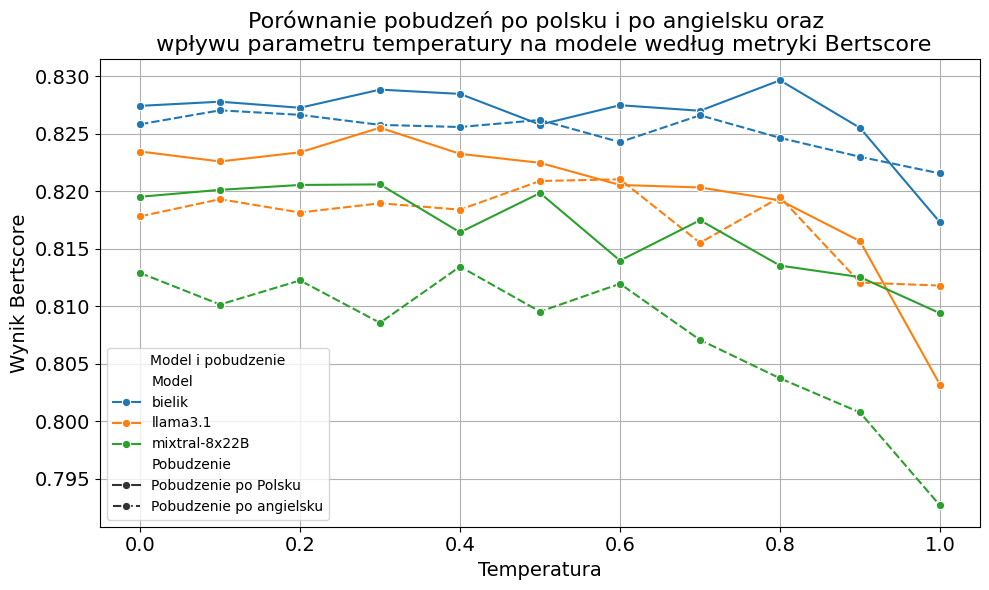

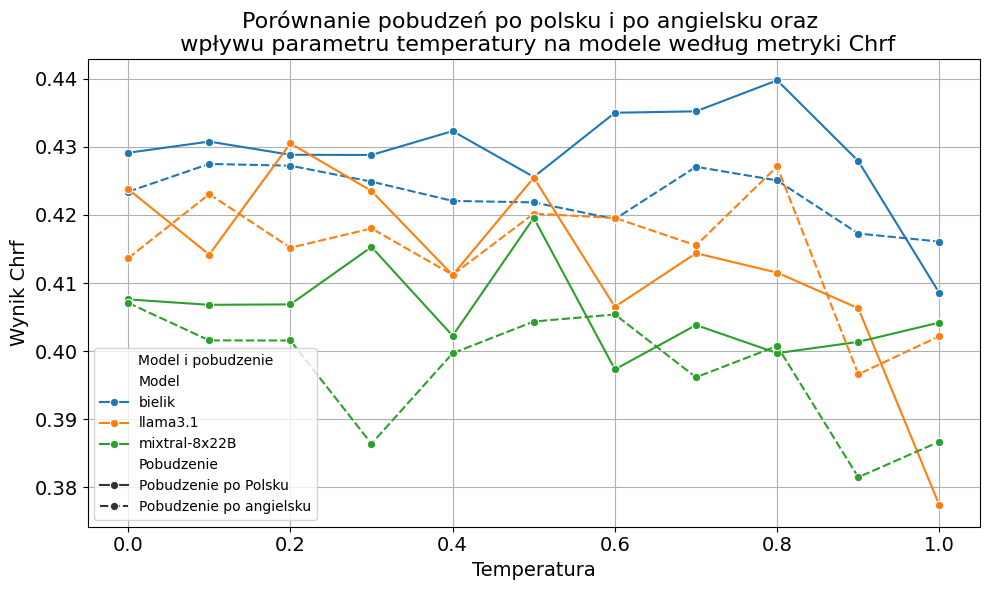

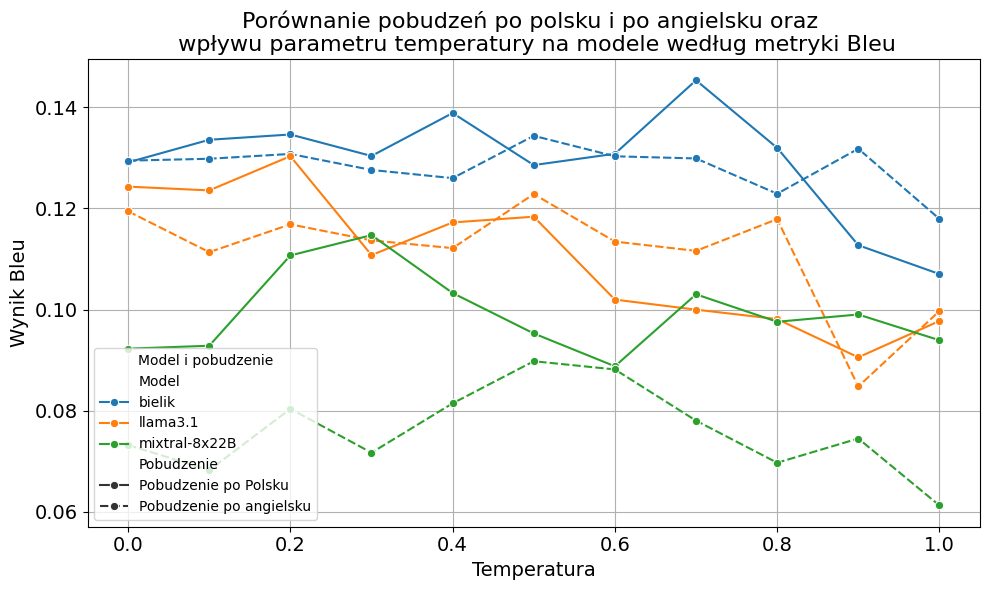

In [22]:
metrics = ["comet", "bertscore", "chrf", "bleu"]

for metric in metrics:
# Filter columns for the specific metric and exclude "google"
    columns_to_compare_en = [col for col in translations_temperatures_metrics_en_prompt.columns if metric in col.lower() and "google" not in col.lower()]
    columns_to_compare_pl = [col for col in translations_temperatures_metrics.columns if metric in col.lower() and "google" not in col.lower()]

    # Extract model names, temperatures, and values for both datasets
    comparison_data = []

    # Process the English prompt dataset
    for col in columns_to_compare_en:
        parts = col.split("_")
        model_name = parts[1]  # Extract the model name
        temperature = float(parts[-1]) if len(parts) > 3 else 0.0  # Extract the temperature
        value = translations_temperatures_metrics_en_prompt[col].iloc[0]  # Assuming scores are in the first row
        comparison_data.append({
            "Model": model_name,
            "Temperature": temperature,
            "Value": value,
            "Pobudzenie": "Pobudzenie po angielsku"
        })

    # Process the Polish prompt dataset
    for col in columns_to_compare_pl:
        parts = col.split("_")
        model_name = parts[1]  # Extract the model name
        temperature = float(parts[-1]) if len(parts) > 3 else 0.0  # Extract the temperature
        value = translations_temperatures_metrics[col].iloc[0]  # Assuming scores are in the first row
        comparison_data.append({
            "Model": model_name,
            "Temperature": temperature,
            "Value": value,
            "Pobudzenie": "Pobudzenie po Polsku"
        })

    # Create a DataFrame for plotting
    comparison_df = pd.DataFrame(comparison_data)

    # Sort the data by Model, Temperature, and Dataset
    comparison_df = comparison_df.sort_values(by=["Model", "Temperature", "Pobudzenie"])

    # Plot the line plot
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=comparison_df, x="Temperature", y="Value", hue="Model", style="Pobudzenie", marker="o", palette="tab10")
    plt.title(f"Porównanie pobudzeń po polsku i po angielsku oraz \n wpływu parametru temperatury na modele według metryki {metric.capitalize()}", fontsize=16)
    plt.xlabel("Temperatura", fontsize=14)
    plt.ylabel(f"Wynik {metric.capitalize()}", fontsize=14)
    plt.xticks(fontsize=14)  # Increase x-axis tick label font size
    plt.yticks(fontsize=14)
    plt.legend(title="Model i pobudzenie", fontsize=10)
    plt.grid(True)
    plt.tight_layout()

    # Save the plot
    plt.savefig(f"figs/{metric}_scores_across_temperatures_comparison.png")
    plt.show()